In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Calling the training and test sets
data_train= pd.read_csv('fashion-mnist_train.csv')
data_test= pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Shape of input image (grayscale image)
img_rows,img_cols=28,28
input_shape = (img_rows, img_cols, 1)

In [4]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Extracting the independent variables from df_train and converting to arrays
X = np.array(data_train.iloc[:, 1:])
# Extracting the dependent variable from df_train and converting to arrays and converting the integer array to one hot 
y = to_categorical(np.array(data_train.iloc[:, 0]))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
# Converting the Test data to the right format 
X_test= np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

In [11]:
# reshaping the sets into image formats
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [12]:
# To Normalize the values, convert to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

## KERAS

In [13]:
import keras
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

In [14]:
X_train.shape

(48000, 28, 28, 1)

In [15]:
def model(input_shape):
    
    # Create a placeholder for input shape. Think os this as youtr input image

    X_input = Input(input_shape)
    
    # First Convultion Layer and Activation
    X = Conv2D(32, (7,7), name = 'conv0')(X_input)
    #X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    # Maxpool layer
    
    X = MaxPooling2D((2,2), name='max_pool')(X)
    
    # Dropout ( Makes a %age of inputs = 0 to prevent overfitting)    
    X = Dropout(0.25)(X)
    
    # Second convolution
    X = Conv2D(64, (3, 3))(X)
    #X = BatchNormalization(axis = 1)(X)
    X = Activation('relu')(X)
    
    # Second maxpool 
    X = MaxPooling2D((2, 2))(X)
    
    # Dropout ( Makes a %age of inputs = 0 to prevent overfitting)    
    X = Dropout(0.25)(X)
    
    # Third Convolution
    X = Conv2D(128, (3, 3))(X)
    #X = BatchNormalization(axis = 1)(X)
    X = Activation('relu')(X)
    
    # Dropout ( Makes a %age of inputs = 0 to prevent overfitting)
    X = Dropout(0.4)(X)
               
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(128, activation='relu')(X)
    
    # Dropout ( Makes a %age of inputs = 0 to prevent overfitting)
    X = Dropout(0.3)(X)
               
    # Last FC
    X = Dense(10, activation= 'softmax')(X)
               
    # Create the model

    model = Model(inputs=X_input, outputs=X)
    
    return model

In [16]:
# Create the model

Model = model(X_train.shape[1:]) #image shape not the shape with training examples

In [17]:
# Compile the model
Model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# To change learning rate use below
#keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [18]:

#Model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose= 1, validation_data=(X_val,y_val))

In [19]:
# Model.evaluate(X_test, y_test, verbose=0)

In [20]:
#Useful command to find the structure of your ConvNet
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 22, 22, 32)        1600      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 64)          0         
__________

In [21]:
# Set the hyperparameters
batch_size = 256
epochs = 5
# Fit the model 
history = Model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose= 1, validation_data=(X_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 36s 754us/step - loss: 0.9748 - acc: 0.6334 - val_loss: 0.5898 - val_acc: 0.7712
Epoch 2/5
48000/48000 [==============================] - 35s 734us/step - loss: 0.5966 - acc: 0.7723 - val_loss: 0.4971 - val_acc: 0.8180
Epoch 3/5
48000/48000 [==============================] - 35s 731us/step - loss: 0.5178 - acc: 0.8082 - val_loss: 0.4251 - val_acc: 0.8440
Epoch 4/5
48000/48000 [==============================] - 35s 721us/step - loss: 0.4656 - acc: 0.8299 - val_loss: 0.3917 - val_acc: 0.8547
Epoch 5/5
48000/48000 [==============================] - 35s 724us/step - loss: 0.4306 - acc: 0.8429 - val_loss: 0.3731 - val_acc: 0.8623


In [22]:
Model.evaluate(X_test, y_test, verbose=0)

[0.3538253816127777, 0.8666]

### Visualization


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Gives a list of accuracies
accuracy= history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

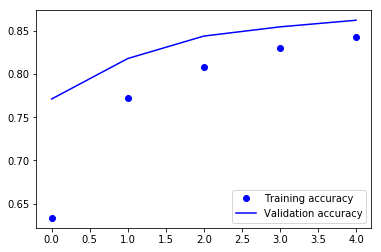

In [25]:
# Define x-axis
epoch=range(len(accuracy))
# Plot
plt.plot(epoch, accuracy, 'bo', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.show()

### Classification Report

In [31]:
# Predicts the probabailities of each class for every example
pred = Model.predict(X_test)

# Get prediction and true values
class_pred=np.argmax(pred, axis=1)
y_true = data_test.iloc[:,0]

print(classification_report(y_true, class_pred))

             precision    recall  f1-score   support

          0       0.76      0.86      0.81      1000
          1       0.99      0.97      0.98      1000
          2       0.76      0.80      0.78      1000
          3       0.90      0.89      0.90      1000
          4       0.75      0.83      0.79      1000
          5       0.96      0.96      0.96      1000
          6       0.70      0.51      0.59      1000
          7       0.96      0.90      0.92      1000
          8       0.97      0.96      0.97      1000
          9       0.90      0.98      0.94      1000

avg / total       0.87      0.87      0.86     10000

